### **Vectorization**: 
Method of utilizing functions that do faster numerical computation using parallel processing capabilities of CPU or GPU than for loops. 
In python numpy methods are vectorized, always perform better than for loops

In [1]:
import numpy as np 
import time

In [6]:
a = np.random.rand(1000000)
b = np.random.rand(1000000)

In [32]:
start = time.time()
z = np.dot(a,b)
end = time.time()
print("Vectorized time = {0}{1}".format(1000*(end -start),' milli secs'))
print(z)

Vectorized time = 0.7810592651367188 milli secs
250355.004922


In [31]:
start = time.time()
z = 0
for i in range(1000000):
    z+= a[i]*b[i]
end = time.time()
print("For Loop time = {0}{1}".format(1000*(end -start),' milli secs'))
print(z)
    

For Loop time = 346.8492031097412 milli secs
250355.004922


### Example of vectorization

In [247]:
# Vectorize 
a = np.arange(12).reshape(3,4)
b = np.arange(4).reshape(4,1)
c = np.zeros_like(a)

# a.shape = (3,4)
# b.shape = (4,1)

for i in range(3):
  for j in range(4):
    c[i][j] = a[i][j] + b[j]
print(a)
print(b)
print(c)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[0]
 [1]
 [2]
 [3]]
[[ 0  2  4  6]
 [ 4  6  8 10]
 [ 8 10 12 14]]


In [248]:
a + b.T

array([[ 0,  2,  4,  6],
       [ 4,  6,  8, 10],
       [ 8, 10, 12, 14]])

### Importance of Vectorization

In Deep Learning, we will mostly deal with massive calculations, vectorization can make a big difference in completing
a single iteration. 
On smaller data sets, it used to be 'good to have' option, in deep learning, it becomes must have

Numpy methods perform vectorization and are way faster than loops. 
Example: element wise operations performed by functions-
exp(x), abs(x), exp(x) , log(x), 1/x where x is a matrix

## Vectorization of Logistic Regression using representation in 1_LR_algo_math_rep.ipynb

## Design of algorithm implementation

|-- process_data : Function to convert an array of images of size $m * num_{px} * num_{px} * 3$ into a two dimensional matrix  
|-- 'Initialize Weights' : Function to Initialize weights   
|-- 'Sigmoid' : Activation Function for LR, can be changed so keep as a separate function  
|-- 'propagate' : Function to do forward propagation to compute activation function, Cost function, backward          
                   propgation to compute change in weights  
|-- 'optimize' : Function to run iterations   
|-- 'predict'. : Function to convert predicted probability to label  
|-- 'lr_model' : Function utilizing above functions to take a dataset, no. of iterations, alpha and return wights,                      bias, Loss values after trainining.   


In [3]:
# Imageine Loading the data (cat/non-cat) after loading libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
#from lr_utils import load_dataset

%matplotlib inline
#train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

### Step 1: Pre-process

In [12]:
a1 = np.arange(60).reshape((5,3,2,2))
# Interpret the array as 5 images each represnted by 3 2*2 arrays
a1

array([[[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11]]],


       [[[12, 13],
         [14, 15]],

        [[16, 17],
         [18, 19]],

        [[20, 21],
         [22, 23]]],


       [[[24, 25],
         [26, 27]],

        [[28, 29],
         [30, 31]],

        [[32, 33],
         [34, 35]]],


       [[[36, 37],
         [38, 39]],

        [[40, 41],
         [42, 43]],

        [[44, 45],
         [46, 47]]],


       [[[48, 49],
         [50, 51]],

        [[52, 53],
         [54, 55]],

        [[56, 57],
         [58, 59]]]])

In [24]:
# To turn this into a 2D array, each image represented by a column
a2 = a1.reshape(5,-1) # the unrolling happens row by row and in sequence for each of 3 arrays corresponding to an image
print(a2)
a3 = a2.T.copy() # copy because T produces a view, and changes made to view are broadcasted back
#then take transpose

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55 56 57 58 59]]


One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel)

In [349]:
def process_data(train_x):
    '''
    Function flattern the array to two dimen
    Arguments:
    train_x : numpy array of size m * num_{px} * num_{px} * 3
    
    Returns:
    train_x_flatten : A two dim. array of dim n*m, where n= num_{px} * num_{px} * 3; after reshaping and normalizing
    '''
    train_x_flatten = train_x.reshape(train_x.shape[0],-1).T.copy
    train_x_flatten /= 255 # Normalize by dividing by maximum possible, normalizing enable gradient descent to train 
                           # faster
        
    return train_x_flatten
    

### Step 2: Initialize weights

In [414]:
def initialize_weights(dim):
    '''
    Argumnts : 
    dim : scalar
    
    Returns:
    w : n*1 matrix
    b : scalar
    '''
    w_init = np.random.rand(dim,1)
    b_init = np.random.rand()
    assert(w_init.shape == (dim,1))
    assert(isinstance(b_init, float) or isinstance(b_init, int) )
    dic = {"w" : w_init,
          "b" : b_init}
    return dic

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w_init = np.zeros((dim,1))
    b_init = 0
    ### END CODE HERE ###

    assert(w_init.shape == (dim, 1))
    assert(isinstance(b_init, float) or isinstance(b_init, int))
    
    dic = {"w" : w_init,
          "b" : b_init}
    return dic

# Unit Test
dim = 2
dic = initialize_weights(dim)
print ("w = " + str(dic['w']))
print ("b = " + str(dic['b']))

w = [[ 0.33813498]
 [ 0.60331013]]
b = 0.4470709640209256


### Step 3: Sigmoid Function to compute $ a^{(i)}$

In [351]:
import numpy as np
def sigmoid(z):
    '''
    Argumnts : 
    z : 1* m matrix
    
    Returns:
    A : 1*m matrix'''
    #print("dimension of X is {0}, W is {1}, B is {2}".format(str(X.shape), str(W.shape),str(B.shape)))
    A = 1/(1 + np.exp(-1*z))
    return(A)

# Unit test
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))
# Expected O/P :  [ 0.5         0.88079708]

sigmoid([0, 2]) = [ 0.5         0.88079708]


### Step 4: Propagage - forward and back in one iteration

In [352]:
# np.squeeze reduces dimensions of an array by removing dimension present as 1
a = np.arange(20).reshape(1,4,5)
a

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]])

In [353]:
a.squeeze().shape

(4, 5)

In [405]:
def propagate(w,b,X,Y):
    '''
    Arguments:
    Y: 1*m vector
    X: n*m matrix
    w: n*1 column vector
    b: scalar
    Returns:
    Cost : Negative likelihood 
    dw : Matrix of Change in weights, of n*1 dims
    db : Change in bias, a scalar'''
    
  
    m = X.shape[1]
    # Forward propagation
    z = np.dot(w.T,X)+ b  # use of broadcasting
    a = sigmoid(z)
    loss = -1 *(Y * np.log(a) + (1-Y)*(np.log(1-a)))
    cost = np.sum(loss, axis = 1)/m
    cost = cost.squeeze()
    assert(cost.shape==())
    dz = a - Y
    dw = np.dot(X, dz.T) / m# n*1 vec
    assert(dw.shape == w.shape)
    db = np.sum(dz, axis = 1)/m
    assert(db.dtype == float)
    grads = {'dw' : dw,
           'db' : db}
    return grads, cost

## Unit test
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))
    

dw = [[ 0.99845601]
 [ 2.39507239]]
db = [ 0.00145558]
cost = 5.801545319394553


**Expected Output**:

dw = [[ 0.99845601]
 [ 2.39507239]]
db = [ 0.00145558]
cost = 5.801545319394553

### Step 5: Optimize

In [418]:
def optimize(w, b, X, Y, iters, alpha, print_cost = False):
    '''
    Arguments:
       X     : n*m matrix of numerical features
       y     : 1*m vector of binary labels
       iters  : max. no of iterations if exit criteria is not satisfied, to avoid long training iteration,
              switch to using larger learning rate
       alpha : learning rate  
       print_cost = If cost is to be printed every 100 iterations
       
    Returns:
    params : dictionary containing the weights w and bias b
    grads : dictionary containing the gradients of the weights and bias with respect to the cost function
    costs : list of all the costs computed during the optimization, this will be used to plot the learning curve.
    '''
    #2. Compute z
    #3. Compute a
    #4. Compute Cost
    #5. Adjust weights and bias
    #6. Compute cost
    #7. Check if cost of step 5 decreases than in step 3, if yes go to step 2, if no decrease happened for 10 iterations
    #  stop, and return cost, weights, bias
    params ={}
    grads ={}
    costs =[]
    for i in range(iters):
        grads, cost = propagate(w,b,X,Y)
        costs.append(cost)
        w = w - alpha * grads['dw']
        b = b - alpha * grads['db']
        # Print the cost every 1000 training iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {'w' : w, 'b' : b}
    return params, grads, costs    
    
## Unit test
params, grads, costs = optimize(w, b, X, Y, iters= 100, alpha = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[-0.08608643]
 [ 0.10971233]]
b = [-0.14427427]
dw = [[ 0.12311093]
 [ 0.13629247]]
db = [-0.14923916]


** Expected Output**
w = [[ 0.19033591]
 [ 0.12259159]]
b = [ 1.92535983]
dw = [[ 0.67752042]
 [ 1.41625495]]
db = [ 0.2191945]

### Step 6: predict

In [407]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    dic -- dic of numpy arrays (vectors) containing probabilities and all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    w = w.reshape(X.shape[0],1)
    z = np.dot(w.T,X) + b
    predicted_probs_y = sigmoid(z)
    predicted_labels_y = np.zeros((1,m))
    predicted_labels_y = np.where(predicted_probs_y > 0.5,1,predicted_labels_y)
    assert(predicted_probs_y.shape == (1,m))
    assert(predicted_labels_y.shape == (1,m))
    dic = {'probs' : predicted_probs_y,
          'labels' : predicted_labels_y}
    return dic

# Unit Test
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = {'probs': array([[ 0.52241976,  0.50960677,  0.34597965]]), 'labels': array([[ 1.,  1.,  0.]])}


### Step 7: LR_model

In [419]:
def lr_model(X_train,Y_train, X_test, Y_test, alpha = 0.05, iters = 2000, print_cost = True):
    '''
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train : training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    iters -- hyperparameter representing the number of iterations to optimize the parameters
    alpha -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    '''
    assert(X_train.shape[1]==Y_train.shape[1])
    assert(Y_train.shape[0] == 1)
    #dic = initialize_weights(X_train.shape[0])
    dic = initialize_with_zeros(X_train.shape[0])
    w = dic['w']
    b = dic['b']
    params, grads, costs = optimize(w, b, X_train, Y_train, iters, alpha, print_cost)
    # Print training error
    preds_dic_train = predict(w, b, X_train)
    preds_dic_test = predict(w, b, X_test)
    accuracy_train = np.sum(preds_dic_train['labels'] == Y_train)/Y_train.shape[1]
    accuracy_test = np.sum(preds_dic_test['labels'] == Y_test)/Y_test.shape[1]
    print("The training accuracy is {0} %".format(accuracy_train*100))
    print("The testing accuracy is {0} %".format(accuracy_test*100))
    
    d = {'w' :w,
         'b' :b,
         'costs': costs,
          'learning_rate' : alpha,
          'iterations' : iters}
    return d

### Test on a structured data set

In [409]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(dir(data), data.data.shape)

['DESCR', 'data', 'feature_names', 'target', 'target_names'] (569, 30)


In [410]:
no_train = int(0.7*569)
np.random.seed(1001)
train_sample = np.random.choice(a = np.arange(569), size = no_train,replace = False)
assert(len(np.unique(train_sample))==no_train)

train_index = np.isin(np.arange(569),train_sample)
test_index = ~train_index
print(train_index.shape, test_index.shape)

(569,) (569,)


In [411]:
train_X = data.data[train_index].T.copy() # boolean indexing creates a copy; T creates a view
train_Y = data.target[train_index].reshape(1,-1)
test_X = dt[test_index].T.copy()
test_Y = data.target[test_index].reshape(1,-1)
print(train_X.shape, test_X.shape,train_Y.shape,test_Y.shape)

(30, 398) (30, 171) (1, 398) (1, 171)


In [412]:
# Normalize X matrices
train_X = (train_X - np.mean(train_X, axis = 1).reshape(-1,1))/np.std(train_X,axis = 1).reshape(-1,1)
test_X = (test_X - np.mean(test_X, axis = 1).reshape(-1,1))/np.std(test_X,axis = 1).reshape(-1,1)

In [423]:
model = lr_model(train_X, train_Y, test_X, test_Y, alpha = 0.1, iters = 10000, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.053462
Cost after iteration 2000: 0.045436
Cost after iteration 3000: 0.041301
Cost after iteration 4000: 0.038535
Cost after iteration 5000: 0.036470
Cost after iteration 6000: 0.034835
Cost after iteration 7000: 0.033488
Cost after iteration 8000: 0.032349
Cost after iteration 9000: 0.031364
The training accuracy is 38.19095477386934 %
The testing accuracy is 35.08771929824561 %


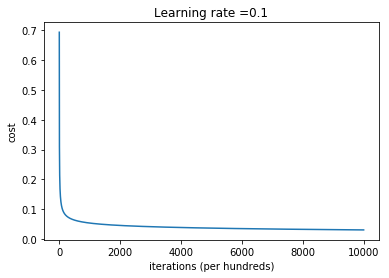

In [425]:
# Plot learning curve (with costs)
costs = np.squeeze(model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per thousands)')
plt.title("Learning rate =" + str(model["learning_rate"]))
plt.show()

## Impact of learning rate

learning rate is: 0.01
The training accuracy is 38.19095477386934 %
The testing accuracy is 35.08771929824561 %

-------------------------------------------------------

learning rate is: 0.001
The training accuracy is 38.19095477386934 %
The testing accuracy is 35.08771929824561 %

-------------------------------------------------------

learning rate is: 0.0001
The training accuracy is 38.19095477386934 %
The testing accuracy is 35.08771929824561 %

-------------------------------------------------------



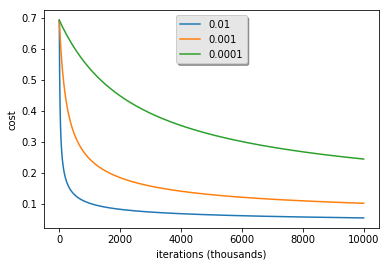

In [428]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = lr_model(train_X, train_Y, test_X, test_Y, iters = 10000, alpha = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (thousands)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, usually recommend that : 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (TBD)



## TBD : Run the algorithm on a images data later, confirm cost function can oscillate up an downs

## Code snipped below from scipy to process image

In [ ]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "my_image.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")